## **Predicting the Price of Pizza based upon it's Diameter, Topping..etc**



## **Import Libraries**



In [1]:
import pandas as pd
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 8)
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline



## **Import The Dataset**
Dataset was dowloaded from kaggle 



In [2]:
dataPizza = pd.read_csv(r'C:\Users\harshith\Desktop\pizza_v1.csv')

## **Cleaning & Checking The Dataset**


In [3]:
# Checking the first 5 rows of data
dataPizza.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [4]:
# Checking the last 5 rows of data
dataPizza.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


In [5]:
# Getting the information about the dataset
dataPizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [6]:
dataPizza['price_rupiah'] = dataPizza['price_rupiah'].str.replace('Rp', '').str.replace(',', '')
dataPizza['price_rupiah'] = pd.to_numeric(dataPizza['price_rupiah'])
dataPizza['price_rupiah'] = dataPizza['price_rupiah'].astype('float64')

In [7]:
dataPizza.loc[:, ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']]

,company,topping,variant,size,extra_sauce,extra_cheese
0,A,chicken,double_signature,jumbo,yes,yes
1,A,papperoni,double_signature,jumbo,yes,yes
2,A,mushrooms,double_signature,reguler,yes,yes
3,A,smoked beef,double_signature,reguler,yes,no
4,A,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...
124,E,tuna,spicy tuna,small,yes,yes
125,E,tuna,spicy tuna,medium,yes,yes
126,E,tuna,spicy tuna,large,yes,yes
127,E,meat,BBQ_meat_fiesta,small,yes,no


## **Encode**



In [8]:
labelEncoder = LabelEncoder()

In [9]:
dataPizza['company'] = labelEncoder.fit_transform(dataPizza['company'])
dataPizza['topping'] = labelEncoder.fit_transform(dataPizza['topping'])
dataPizza['variant'] = labelEncoder.fit_transform(dataPizza['variant'])
dataPizza['size'] = labelEncoder.fit_transform(dataPizza['size'])
dataPizza['extra_sauce'] = labelEncoder.fit_transform(dataPizza['extra_sauce'])
dataPizza['extra_cheese'] = labelEncoder.fit_transform(dataPizza['extra_cheese'])

After encoding, we must convert our data to type as float64 since machine learning model have a good performance if the data is float number (cmiiw).

In [10]:
dataPizza['company'] = dataPizza['company'].astype('float64')
dataPizza['topping'] = dataPizza['topping'].astype('float64')
dataPizza['variant'] = dataPizza['variant'].astype('float64')
dataPizza['size'] = dataPizza['size'].astype('float64')
dataPizza['extra_sauce'] = dataPizza['extra_sauce'].astype('float64')
dataPizza['extra_cheese'] = dataPizza['extra_cheese'].astype('float64')

In [11]:
dataPizza.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2.046512,87151.162791,12.976744,5.294574,8.155039,2.868217,0.589147,0.666667
std,1.435381,44706.097732,3.272674,3.204984,5.265527,1.470437,0.493907,0.473242
min,0.000000,23500.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,51000.000000,12.000000,2.000000,4.000000,2.000000,0.000000,0.000000
50%,2.000000,78000.000000,12.000000,5.000000,6.000000,3.000000,1.000000,1.000000
75%,3.000000,105000.000000,14.000000,9.000000,13.000000,4.000000,1.000000,1.000000
max,4.000000,248000.000000,22.000000,11.000000,19.000000,5.000000,1.000000,1.000000


**Coefficient of Variation**


In [12]:
covCompany = ((dataPizza['company'].std()/dataPizza['company'].mean()) * 100)
print(f'Coefficient Of Variation Company : {covCompany}%')

covPrice = ((dataPizza['price_rupiah'].std()/dataPizza['price_rupiah'].mean()) * 100)
print(f'Coefficient Of Variation Price : {covPrice}%')

covDiameter = ((dataPizza['diameter'].std()/dataPizza['diameter'].mean()) * 100)
print(f'Coefficient Of Variation Diameter : {covDiameter}%')

covTopping = ((dataPizza['topping'].std()/dataPizza['topping'].mean()) * 100)
print(f'Coefficient Of Variation Topping : {covTopping}%')

covSize = ((dataPizza['size'].std()/dataPizza['size'].mean()) * 100)
print(f'Coefficient Of Variation Size : {covSize}%')

covExtSauce = ((dataPizza['extra_sauce'].std()/dataPizza['extra_sauce'].mean()) * 100)
print(f'Coefficient Of Variation Sauce : {covExtSauce}%')

covExtCheese = ((dataPizza['extra_cheese'].std()/dataPizza['extra_cheese'].mean()) * 100)
print(f'Coefficient Of Variation Cheese : {covExtCheese}%')

Coefficient Of Variation Company : 70.1379548404016%
Coefficient Of Variation Price : 51.29719019276373%
Coefficient Of Variation Diameter : 25.219527682743%
Coefficient Of Variation Topping : 60.53337574131796%
Coefficient Of Variation Size : 51.26658856048115%
Coefficient Of Variation Sauce : 83.83415842257291%
Coefficient Of Variation Cheese : 70.98635432250343%


In [13]:
# Making correlation data 
correlation = dataPizza.corr()
correlation

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
company,1.000000,-0.300033,-0.182710,0.002093,-0.109497,0.021434,-0.038954,0.034503
price_rupiah,-0.300033,1.000000,0.826977,-0.077875,0.130395,-0.551606,0.083859,0.011817
diameter,-0.182710,0.826977,1.000000,-0.178475,0.193343,-0.836722,-0.063957,0.055488
topping,0.002093,-0.077875,-0.178475,1.000000,0.255129,0.145894,0.042505,-0.012019
variant,-0.109497,0.130395,0.193343,0.255129,1.000000,-0.255651,-0.029388,0.268582
size,0.021434,-0.551606,-0.836722,0.145894,-0.255651,1.000000,0.226068,-0.119754
extra_sauce,-0.038954,0.083859,-0.063957,0.042505,-0.029388,0.226068,1.000000,-0.089131
extra_cheese,0.034503,0.011817,0.055488,-0.012019,0.268582,-0.119754,-0.089131,1.000000


# **Z-score**



In [14]:
test1 = (dataPizza['price_rupiah'].max() + float(20000))
test2 = (dataPizza['price_rupiah'].min() - float(3500))
test3 = ((dataPizza['price_rupiah'].max() / dataPizza['price_rupiah'].min()) + float(50000))
test4 = ((dataPizza['price_rupiah'].max() / dataPizza['price_rupiah'].min()) - float(50000))


standardScore1 = ((test1 - dataPizza['price_rupiah'].mean()) / dataPizza['price_rupiah'].std())
print(f'Z-scores 1 : {standardScore1}')


standardScore2 = ((test2 - dataPizza['price_rupiah'].mean()) / dataPizza['price_rupiah'].std())
print(f'Z-scores 2 : {standardScore2}')


standardScore3 = ((test3 - dataPizza['price_rupiah'].mean()) / dataPizza['price_rupiah'].std())
print(f'Z-scores 3 : {standardScore3}')


standardScore4 = ((test4 - dataPizza['price_rupiah'].mean()) / dataPizza['price_rupiah'].std())
print(f'Z-scores 4 : {standardScore4}')

Z-scores 1 : 4.045283448661596
Z-scores 2 : -1.5020582470276294
Z-scores 3 : -0.8307727912621121
Z-scores 4 : -3.0676041201690576


In [15]:
dataPizza.sample(2, random_state=1).T

,122,104
company,4.0,4.0
price_rupiah,83000.0,83000.0
diameter,17.0,17.0
topping,2.0,2.0
variant,15.0,15.0
size,0.0,0.0
extra_sauce,0.0,0.0
extra_cheese,1.0,1.0


## **Visualize  The Data**



In [16]:
sns.set_theme(color_codes=True, style='darkgrid', palette='deep', font='sans-serif')

[]

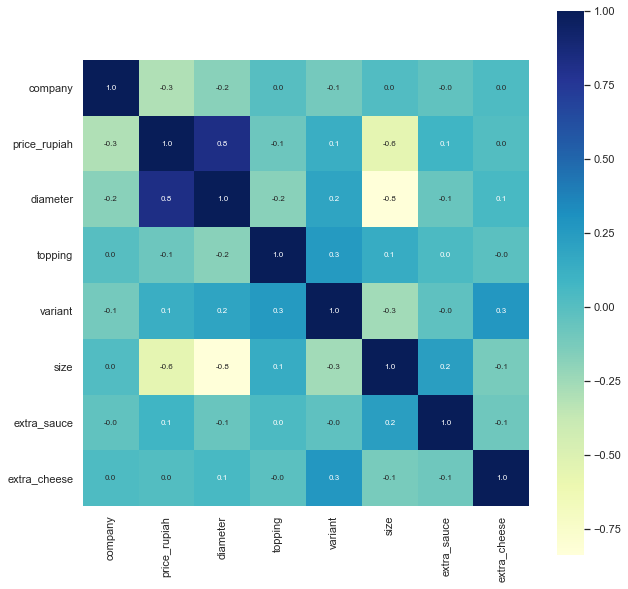

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='YlGnBu')
plt.plot()

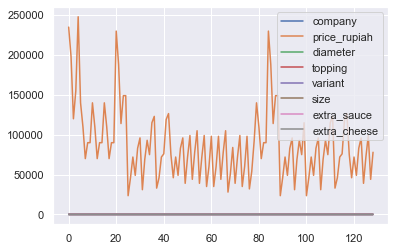

In [18]:
dataPizza.plot()
plt.show()

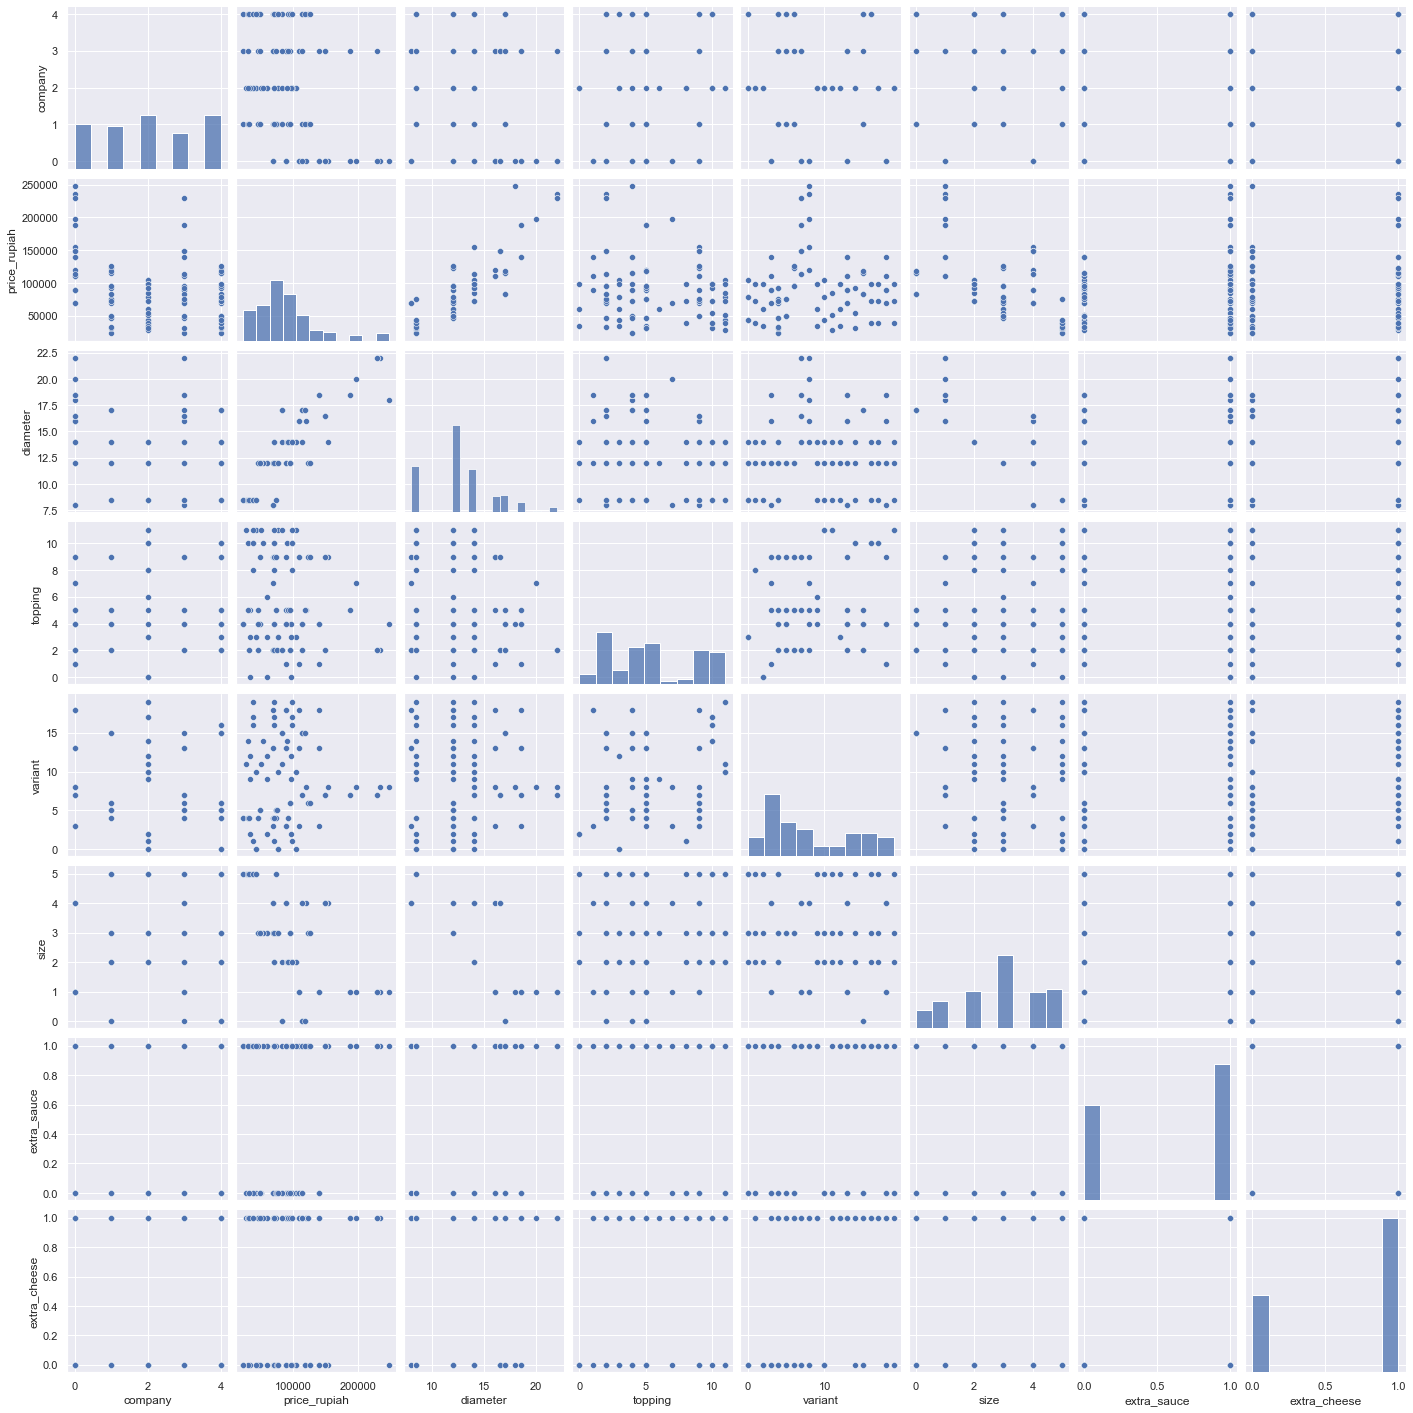

In [19]:
sns.pairplot(dataPizza)
plt.show()

## **Splitting the Data**



In [20]:
X = dataPizza.drop(['price_rupiah'], axis=1)
y = dataPizza['price_rupiah']

In [21]:
trainX, testX, trainY, testY = train_test_split(
    X, y,
    test_size=.1,
    shuffle=False,
    random_state=0)

## **Regression with XGBRegressor**



In [22]:
# XGBoost uses an internal data structure DMatrix - which optimizes both memory effieciency and speed
regressor = XGBRegressor(
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    booster='gbtree'
)

model = regressor.fit(trainX, trainY)

In [23]:
model.score(testX,testY)

0.9458520377949969

Regression

In [24]:
myPipeline = Pipeline(steps=[('model', model)])

## **Model Evaluate**

In [25]:
# predict X train
trainPredict = myPipeline.predict(trainX)

# predict X test  
testPredict = myPipeline.predict(testX)

In [26]:
# Train X 

# R Squared 
trainRsquared = metrics.r2_score(trainY, trainPredict)
print(f'R-Squared : {trainRsquared}')

# Mean Absolute Error
trainMAE = metrics.mean_absolute_error(trainY, trainPredict)
print(f'MAE : {trainMAE}')

#  Mean Squared Error
trainMSE = metrics.mean_squared_error(trainY, trainPredict)
print(f'MSE : {trainMSE}')

#  Root Mean Squared Error
trainRMSE = math.sqrt(metrics.mean_squared_error(trainY, trainPredict))
print(f'RMSE : {trainRMSE}')

# Median
trainM = metrics.median_absolute_error(trainY, trainPredict)
print(f'Median : {trainM}')

R-Squared : 0.9999999999738813
MAE : 0.15862405711206898
MSE : 0.05513076124520137
RMSE : 0.2347994063987415
Median : 0.095703125


In [27]:
# Test X  

# R Squared 
testRsquared = metrics.r2_score(testY, testPredict)
print(f'R-Squared : {testRsquared}')

# Mean Absolute Error
testMAE = metrics.mean_absolute_error(testY, testPredict)
print(f'MAE : {testMAE}')

#  Mean Squared Error
testMSE = metrics.mean_squared_error(testY, testPredict)
print(f'MSE : {testMSE}')

#  Root Mean Squared Error
testRMSE = math.sqrt(metrics.mean_squared_error(testY, testPredict))
print(f'RMSE : {testRMSE}')

# Median
testM = metrics.median_absolute_error(testY, testPredict)
print(f'Median : {testM}')

R-Squared : 0.9458520377949969
MAE : 4337.541766826923
MSE : 39268807.075783364
RMSE : 6266.4828313642865
Median : 2292.1640625


# **Data Validation**

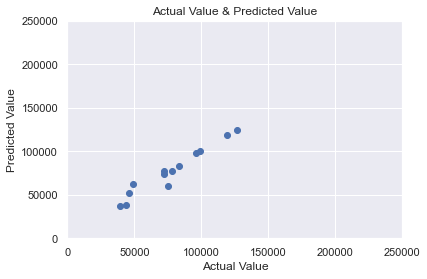

In [28]:
# Test Predicted Value & Actual Value
plt.scatter(testY, testPredict)
plt.title('Actual Value & Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 250000)
plt.ylim(0, 250000)
plt.grid(True)
plt.show()

## **Prediction**

Stroring the values in excel sheet

In [29]:
trainOutput = pd.DataFrame({
    'Train Actual Price': trainY,
    'Train Predicted Price ': trainPredict})

trainOutput.to_csv('Train Prediction.csv', index=False)

In [30]:
x=pd.DataFrame(trainY)
y=pd.DataFrame(trainPredict)

In [31]:
testOutput = pd.DataFrame({
    'Train Actual Price': testY,
    'Train Predicted Price ': testPredict})

testOutput.to_csv('Test Prediction.csv', index=False)

In [32]:
trainPredictedOutput = pd.read_csv('./Test Prediction.csv')
trainPredictedOutput.head(10)

,Train Actual Price,Train Predicted Price
0,119000.0,118668.740
1,126500.0,124207.836
2,75000.0,60376.040
3,46000.0,52485.710
4,72000.0,74265.580
5,49000.0,62245.400
6,83000.0,83000.050
7,96000.0,97771.630
8,39000.0,36563.258
9,72000.0,76997.130
